In [109]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [110]:
pd.options.display.float_format = '{:,.2f}'.format

In [111]:
raw_df_data = pd.read_csv('NLSY97_subset.csv')
raw_df_variable = pd.read_csv('NLSY97_Variable_Names_and_Descriptions.csv')

In [112]:
df_data = raw_df_data.copy()
df_variable = raw_df_variable.copy()

In [113]:
df_variable

,Personal variables,Variable Type,Description
0,FEMALE,D,"Sex of respondent (0 if male, 1 if female)"
1,MALE,D,"Sex of respondent (1 if male, 0 if female)"
2,NaN,NaN,NaN
3,Ethnicity:,NaN,NaN
4,ETHBLACK,D,Black
...,...,...,...
117,URBAN,D,Living in an urban area
118,REGNE,D,Census region North east
119,REGNC,D,Census region North central
120,REGW,D,Census region West


In [114]:
df_data.head()

,ID,EARNINGS,S,EXP,FEMALE,MALE,BYEAR,AGE,AGEMBTH,HHINC97,...,URBAN,REGNE,REGNC,REGW,REGS,MSA11NO,MSA11NCC,MSA11CC,MSA11NK,MSA11NIC
0,4275,18.50,12,9.71,0,1,1984,27,24.00,"64,000.00",...,1,0,0,1,0,0,0,1,0,0
1,4328,19.23,17,5.71,0,1,1982,29,32.00,"6,000.00",...,2,0,0,1,0,0,1,0,0,0
2,8763,39.05,14,9.94,0,1,1981,30,23.00,"88,252.00",...,1,0,0,0,1,0,0,1,0,0
3,8879,16.80,18,1.54,0,1,1983,28,30.00,NaN,...,1,0,1,0,0,0,1,0,0,0
4,1994,36.06,15,2.94,0,1,1984,27,23.00,"44,188.00",...,1,0,0,0,1,0,0,1,0,0


In [115]:
df_data.shape

(2000, 96)

In [116]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 96 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        2000 non-null   int64  
 1   EARNINGS  2000 non-null   float64
 2   S         2000 non-null   int64  
 3   EXP       2000 non-null   float64
 4   FEMALE    2000 non-null   int64  
 5   MALE      2000 non-null   int64  
 6   BYEAR     2000 non-null   int64  
 7   AGE       2000 non-null   int64  
 8   AGEMBTH   1956 non-null   float64
 9   HHINC97   1630 non-null   float64
 10  POVRAT97  1627 non-null   float64
 11  HHBMBF    2000 non-null   int64  
 12  HHBMOF    2000 non-null   int64  
 13  HHOMBF    2000 non-null   int64  
 14  HHBMONLY  2000 non-null   int64  
 15  HHBFONLY  2000 non-null   int64  
 16  HHOTHER   2000 non-null   int64  
 17  MSA97NO   2000 non-null   int64  
 18  MSA97NCC  2000 non-null   int64  
 19  MSA97CC   2000 non-null   int64  
 20  MSA97NK   2000 non-null   int6

In [117]:
df_data.describe()

,ID,EARNINGS,S,EXP,FEMALE,MALE,BYEAR,AGE,AGEMBTH,HHINC97,...,URBAN,REGNE,REGNC,REGW,REGS,MSA11NO,MSA11NCC,MSA11CC,MSA11NK,MSA11NIC
count,"2,000.00","2,000.00","2,000.00","2,000.00","2,000.00","2,000.00","2,000.00","2,000.00","1,956.00","1,630.00",...,"2,000.00","2,000.00","2,000.00","2,000.00","2,000.00","2,000.00","2,000.00","2,000.00","2,000.00","2,000.00"
mean,"3,530.89",18.87,14.58,6.72,0.50,0.50,"1,982.05",28.95,26.42,"58,143.75",...,0.78,0.15,0.27,0.34,0.23,0.05,0.54,0.41,0.00,0.00
std,"2,023.07",11.95,2.74,2.84,0.50,0.50,1.39,1.39,5.04,"42,745.79",...,0.43,0.36,0.44,0.48,0.42,0.21,0.50,0.49,0.06,0.00
min,1.00,2.00,6.00,0.00,0.00,0.00,"1,980.00",27.00,12.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"1,825.00",11.54,12.00,4.69,0.00,0.00,"1,981.00",28.00,23.00,"32,000.00",...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,"3,471.50",15.75,15.00,6.63,0.50,0.50,"1,982.00",29.00,26.00,"50,502.00",...,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
75%,"5,158.25",22.70,16.00,8.70,1.00,1.00,"1,983.00",30.00,30.00,"72,202.50",...,1.00,0.00,1.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00
max,"8,980.00",132.89,20.00,14.73,1.00,1.00,"1,984.00",31.00,45.00,"246,474.00",...,2.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00


In [118]:
df_data.duplicated().any()

True

In [119]:
df_data.drop_duplicates(subset=["ID", "EARNINGS", "S", "EXP", ], inplace=True)

In [120]:
df_data.isna().any()

ID          False
EARNINGS    False
S           False
EXP         False
FEMALE      False
            ...  
MSA11NO     False
MSA11NCC    False
MSA11CC     False
MSA11NK     False
MSA11NIC    False
Length: 96, dtype: bool

In [121]:
df_data.columns

Index(['ID', 'EARNINGS', 'S', 'EXP', 'FEMALE', 'MALE', 'BYEAR', 'AGE',
       'AGEMBTH', 'HHINC97', 'POVRAT97', 'HHBMBF', 'HHBMOF', 'HHOMBF',
       'HHBMONLY', 'HHBFONLY', 'HHOTHER', 'MSA97NO', 'MSA97NCC', 'MSA97CC',
       'MSA97NK', 'ETHBLACK', 'ETHHISP', 'ETHWHITE', 'EDUCPROF', 'EDUCPHD',
       'EDUCMAST', 'EDUCBA', 'EDUCAA', 'EDUCHSD', 'EDUCGED', 'EDUCDO',
       'PRMONM', 'PRMONF', 'PRMSTYUN', 'PRMSTYPE', 'PRMSTYAN', 'PRMSTYAE',
       'PRFSTYUN', 'PRFSTYPE', 'PRFSTYAN', 'PRFSTYAE', 'SINGLE', 'MARRIED',
       'COHABIT', 'OTHSING', 'FAITHN', 'FAITHP', 'FAITHC', 'FAITHJ', 'FAITHO',
       'FAITHM', 'ASVABAR', 'ASVABWK', 'ASVABPC', 'ASVABMK', 'ASVABNO',
       'ASVABCS', 'ASVABC', 'ASVABC4', 'VERBAL', 'ASVABMV', 'HEIGHT',
       'WEIGHT04', 'WEIGHT11', 'SF', 'SM', 'SFR', 'SMR', 'SIBLINGS', 'REG97NE',
       'REG97NC', 'REG97S', 'REG97W', 'RS97RURL', 'RS97URBN', 'RS97UNKN',
       'JOBS', 'HOURS', 'TENURE', 'CATGOV', 'CATPRI', 'CATNPO', 'CATMIS',
       'CATSE', 'COLLBARG', 'URBAN'

In [122]:
df_data.drop(columns=['FEMALE', 'MALE', 'BYEAR', 'AGE',  'AGEMBTH', 'HHINC97', 'POVRAT97', 'HHBMBF', 'HHBMOF', 'HHOMBF',
       'HHBMONLY', 'HHBFONLY', 'HHOTHER', 'MSA97NO', 'MSA97NCC', 'MSA97CC',
       'MSA97NK', 'ETHBLACK', 'ETHHISP', 'ETHWHITE', 'EDUCPROF', 'EDUCPHD',
       'EDUCMAST', 'EDUCBA', 'EDUCAA', 'EDUCHSD', 'EDUCGED', 'EDUCDO',
       'PRMONM', 'PRMONF', 'PRMSTYUN', 'PRMSTYPE', 'PRMSTYAN', 'PRMSTYAE',
       'PRFSTYUN', 'PRFSTYPE', 'PRFSTYAN', 'PRFSTYAE', 'SINGLE', 'MARRIED',
       'COHABIT', 'OTHSING', 'FAITHN', 'FAITHP', 'FAITHC', 'FAITHJ', 'FAITHO',
       'FAITHM', 'ASVABAR', 'ASVABWK', 'ASVABPC', 'ASVABMK', 'ASVABNO',
       'ASVABCS', 'ASVABC', 'ASVABC4', 'VERBAL', 'ASVABMV', 'HEIGHT',
       'WEIGHT04', 'WEIGHT11', 'SF', 'SM', 'SFR', 'SMR', 'SIBLINGS', 'REG97NE',
       'REG97NC', 'REG97S', 'REG97W', 'RS97RURL', 'RS97URBN', 'RS97UNKN',
       'JOBS', 'HOURS', 'TENURE', 'CATGOV', 'CATPRI', 'CATNPO', 'CATMIS',
       'CATSE', 'COLLBARG', 'URBAN', 'REGNE', 'REGNC', 'REGW', 'REGS',
       'MSA11NO', 'MSA11NCC', 'MSA11CC', 'MSA11NK', 'MSA11NIC'], inplace=True)

In [123]:
df_data

,ID,EARNINGS,S,EXP
0,4275,18.50,12,9.71
1,4328,19.23,17,5.71
2,8763,39.05,14,9.94
3,8879,16.80,18,1.54
4,1994,36.06,15,2.94
...,...,...,...,...
1984,2400,9.00,12,10.83
1989,3018,8.00,12,9.37
1991,4550,8.57,17,6.29
1994,3779,9.33,12,9.12


In [124]:
df_data.isna().any()

ID          False
EARNINGS    False
S           False
EXP         False
dtype: bool

In [125]:
df_data.describe()

,ID,EARNINGS,S,EXP
count,"1,487.00","1,487.00","1,487.00","1,487.00"
mean,"3,547.13",18.81,14.56,6.70
std,"2,009.84",12.00,2.77,2.86
min,1.00,2.00,6.00,0.00
25%,"1,888.00",11.41,12.00,4.65
50%,"3,474.00",15.75,15.00,6.63
75%,"5,160.50",22.60,16.00,8.71
max,"8,980.00",132.89,20.00,14.73


In [126]:
X = df_data[["S", "EXP"]]
y= df_data[["EARNINGS"]]

In [127]:
x1_train, x1_test, y1_train, y1_test = train_test_split(X[["S"]],y, test_size=0.2, random_state=10)

In [128]:
regression = LinearRegression()

In [129]:
regression.fit(x1_train, y1_train)

LinearRegression()

In [130]:
regression.score(x1_train, y1_train)

0.08085050566060015

In [131]:
regression.intercept_

array([1.02890741])

In [132]:
regression.coef_

array([[1.21917798]])

<AxesSubplot:xlabel='EARNINGS', ylabel='Prediction'>

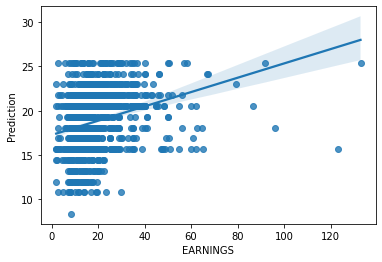

In [133]:
predictions = pd.DataFrame(data=regression.predict(x1_train), columns=["Prediction"])
sns.regplot(x=y1_train["EARNINGS"], y=predictions["Prediction"])

<AxesSubplot:xlabel='Prediction', ylabel='residual'>

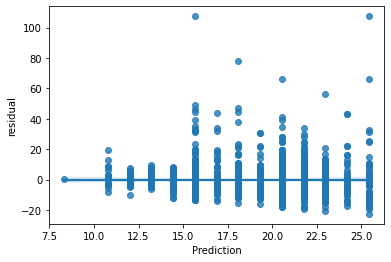

In [136]:
residual = pd.DataFrame(y1_train.reset_index()["EARNINGS"].subtract(predictions["Prediction"]), columns=["residual"])
sns.regplot(y=residual["residual"], x=predictions["Prediction"])

In [138]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [139]:
regr = LinearRegression()
regr.fit(X2_train, y2_train)

LinearRegression()

In [140]:
regr.score(X2_train, y2_train)

0.11705510273476538

In [141]:
regr.coef_

array([[1.79422175, 0.97900689]])

In [142]:
regr.intercept_

array([-13.88779211])

<AxesSubplot:xlabel='EARNINGS', ylabel='Prediction'>

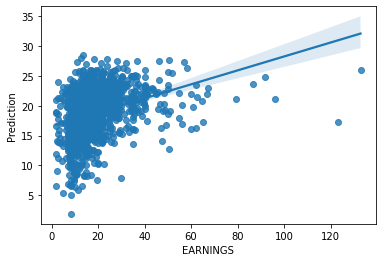

In [143]:
predictions2 = pd.DataFrame(data=regr.predict(X2_train), columns=["Prediction"])
sns.regplot(x=y2_train["EARNINGS"], y=predictions2["Prediction"])

<AxesSubplot:xlabel='Prediction', ylabel='residual'>

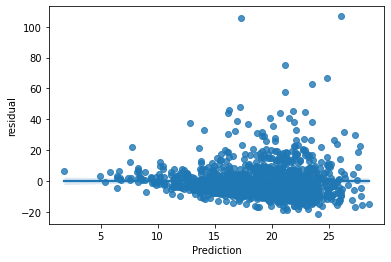

In [144]:
residual2 = pd.DataFrame(y2_train.reset_index()["EARNINGS"].subtract(predictions2["Prediction"]), columns=["residual"])
sns.regplot(y=residual2["residual"], x=predictions2["Prediction"])

In [145]:
regr.predict([[16, 5]])

c:\Users\SAMSON\DataAnalysis\start-tutorial\day-4\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[19.71479036]])